### The goal of this notebook is to apply LDA and NMF models to the Honkai Impact Star Rail player review dataset. By leveraging these two topic modeling techniques, I aim to extract the key aspects that players have complained about and appreciated in the game. To gain deeper insights into player feedback, I have separated the reviews into positive and negative categories, resulting in two distinct datasets: one for positive reviews and one for negative reviews.

### Conclusion: LDA and NMF yields almost the same content. Player have complanited about login issues, difficulty in combact, and kip button for watching animation sorties in demand. However, the character development and envirnoment desgin are pretty good.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import re
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Read DataFrame

In [3]:
df = pd.read_csv("Honkai-Star-Rail-modeling.csv")

In [4]:
df.head()

,snippet,positive_rating
0,The combat is turn-based which is not my favor...,Positive
1,The constant grind for materials to activate c...,Negative
2,I love this game so much. The only mobile game...,Positive
3,I love this game. It has amazing story and cha...,Positive
4,Decent game overall. Beautiful character and m...,Positive


## Preprocessing text

In [5]:
good_X = df[df["positive_rating"] == "Positive"]["snippet"]
bad_X = df[df["positive_rating"] == "Negative"]["snippet"]

### Tokenization

In [6]:
good_X = [simple_preprocess(x) for x in good_X]
bad_X = [simple_preprocess(x) for x in bad_X]

### Remove stop words

In [7]:
stopword_voca = set(stopwords.words("english"))

In [8]:
filtered_good_docs = []
for words in good_X:
    filtered_words = []
    
    for word in words:
        if word not in stopword_voca:
            filtered_words.append(word)
            
    filtered_good_docs.append(filtered_words)

In [9]:
filtered_bad_docs = []
for words in bad_X:
    filtered_words = []
    
    for word in words:
        if word not in stopword_voca:
            filtered_words.append(word)
            
    filtered_bad_docs.append(filtered_words)

### lemmatize words

In [10]:
wl = WordNetLemmatizer()
lemm_good_docs = []
lemm_bad_docs = []

for words in filtered_good_docs:
    lemm_words = []
    for word in words:
        lemm_words.append(wl.lemmatize(word))
    lemm_good_docs.append(lemm_words)

for words in filtered_bad_docs:
    lemm_words = []
    for word in words:
        lemm_words.append(wl.lemmatize(word))
    lemm_bad_docs.append(lemm_words)

### Join words

In [11]:
preprocessed_bad_docs = [" ".join(doc) for doc in lemm_bad_docs]
preprocessed_good_docs = [" ".join(doc) for doc in lemm_good_docs]

In [12]:
preprocessed_good_docs[0]

'combat turn based favorite game made look cool although get repetitive story strong part game opinion every planet look unique different puzzle chest biggest complain character balance ok edit still powercreep issue day every new character way better previous one push player spending game'

In [13]:
## set the number of features for each document
no_features = 1000

## CountVectorizer and LDA

#### countVectorizer with positive reviews

Begin vectorized transform
End vectorized transform


<Axes: xlabel='word'>

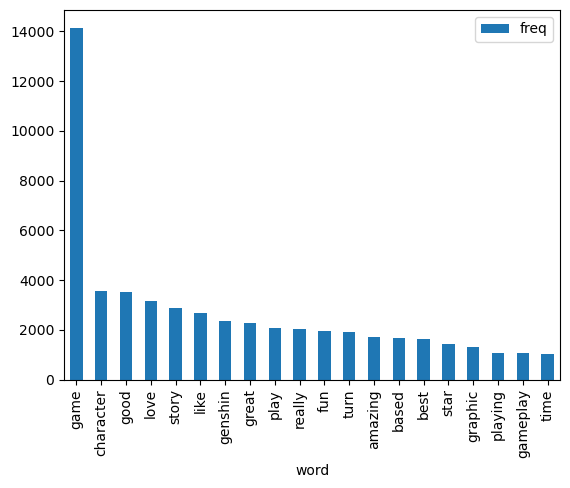

In [14]:
vectorizer_good = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words="english")

print("Begin vectorized transform")
vector_good_X = vectorizer_good.fit_transform(preprocessed_good_docs)
print("End vectorized transform")

word_freq = np.array(vector_good_X.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({"word": vectorizer_good.get_feature_names_out(),'freq': word_freq})
top_words = word_freq_df.sort_values(by="freq", ascending=False).head(20)

top_words.plot.bar(x="word", y="freq")

#### countVectorizer with negative reviews

Begin vectorized transform
End vectorized transform


<Axes: xlabel='word'>

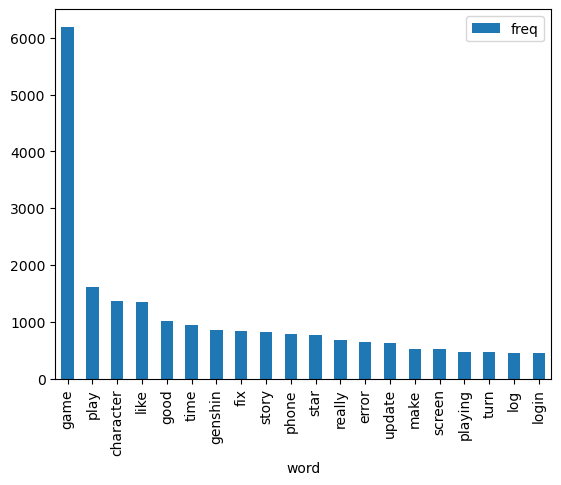

In [15]:
vectorizer_bad = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words="english")

print("Begin vectorized transform")
vector_bad_X = vectorizer_bad.fit_transform(preprocessed_bad_docs)
print("End vectorized transform")

word_freq = np.array(vector_bad_X.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({"word": vectorizer_bad.get_feature_names_out(),'freq': word_freq})
top_words = word_freq_df.sort_values(by="freq", ascending=False).head(20)

top_words.plot.bar(x="word", y="freq")

#### The display_topics function can print topics generated by a topic model 

In [16]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

#### LDA with Positive Reviews

In [17]:
lda_good_X = LatentDirichletAllocation(n_components=10, 
                                max_iter=5, 
                                learning_method="online", 
                                learning_offset=50., 
                                random_state=1234)

print("LDA Begin")
lda_good_X.fit(vector_good_X)
print("LDA End")

LDA Begin
LDA End


#### LDA with negative reviews

In [18]:
lda_bad_X = LatentDirichletAllocation(n_components=10, 
                                max_iter=5, 
                                learning_method="online", 
                                learning_offset=50., 
                                random_state=1234)

print("LDA Begin")
lda_bad_X.fit(vector_bad_X)
print("LDA End")

LDA Begin
LDA End


#### Positive reviews conclusion in LDA: great character designs, graphic desgins, rewards, stories, and battles. 
#### However, players complainted about they got stuck on the login screen and experienced game log crash.

In [19]:
no_top_words1 = 15

display_topics(lda_good_X, vectorizer_good.get_feature_names_out(), no_top_words1)

Topic 0:
game character gacha free pull star time easy rate want wish like lot got play
Topic 1:
game story character amazing good great fun gameplay love design turn really based combat graphic
Topic 2:
star content need developer giving friendly level game make free enemy ratio real universe seele
Topic 3:
game love genshin like impact character honkai amazing play good star really cool better story
Topic 4:
hoyoverse thank game mobile support pc people review controller android firefly yes come making add
Topic 5:
game playing really fun like time good love day play long awesome enjoy download crash
Topic 6:
game best turn based played rpg far mobile honkai good like genshin star gacha base
Topic 7:
game great graphic good nice mihoyo perfect bug thanks issue work phone gameplay run cutscenes
Topic 8:
game good better genshin reward story like player great fun really make way quest pretty
Topic 9:
game play phone update fix problem im pls error storage hope love log new screen


#### Negative Reviews in LDA: players wish that the game can add a skip button to skip stories and think character pull rates are low. 

#### The major issue shown here is the login issue. As I mention above, the game seems to have a server login issue because players always get stuck on login screen.

In [20]:
display_topics(lda_bad_X, vectorizer_bad.get_feature_names_out(), no_top_words1)

Topic 0:
support controller hoyoverse game disappointed got company money gonna review android change min server ok
Topic 1:
game time play hate waste make fun lost want got banner stupid hour money friend
Topic 2:
ad bug said stop wall gone map glitching bro service mode acc seele showing floor
Topic 3:
star free rating game better tell scam sorry draw think sure jade stellar summon giving
Topic 4:
game story like turn character boring gacha rate pull based good skip gameplay genshin bad
Topic 5:
genshin impact like storage big fps delete drop horrible light cone game player available space
Topic 6:
game update download screen loading phone play load gb crashing crash time stuck fix resource
Topic 7:
game error fix log login play account try tried time problem say work open screen
Topic 8:
game play like good phone really genshin honkai love graphic star lag problem great fix
Topic 9:
character game story event make new level bos player good reward relic hard quest need


## TfidfVectorizer and NMF

#### TfidfVectorizer with positive reviews

In [21]:
tfidf_vectorizer_good = TfidfVectorizer(max_features=no_features, 
                                        max_df=0.95, 
                                        min_df=2, 
                                        stop_words="english")

tfidf_vector_good = tfidf_vectorizer_good.fit_transform(preprocessed_good_docs)

#### NMF with positive reviews

In [22]:
nmf_good_X = NMF(n_components=10, l1_ratio=0.5, init="nndsvd")
nmf_good_X.fit(tfidf_vector_good)

NMF(init='nndsvd', l1_ratio=0.5, n_components=10)

#### TfidfVectorizer with negative reviews

In [23]:
tfidf_vectorizer_bad = TfidfVectorizer(max_features=no_features, 
                                        max_df=0.95, 
                                        min_df=2, 
                                        stop_words="english")

tfidf_vector_bad = tfidf_vectorizer_bad.fit_transform(preprocessed_bad_docs)

#### NMF with negative reviews

In [24]:
nmf_bad_X = NMF(n_components=10, l1_ratio=0.5, init="nndsvd")
nmf_bad_X.fit(tfidf_vector_bad)

NMF(init='nndsvd', l1_ratio=0.5, n_components=10)

#### Positive reviews in NMF: the conclusion would be the same as the positive reviews in LDA. The difference is that I don't see that players suggested what aspects the game can improve.

In [25]:
no_top_words2 = 15
display_topics(nmf_good_X, tfidf_vectorizer_good.get_feature_names_out(), no_top_words2)

Topic 0:
great game reward graphic overall storyline time generous play far experience content gacha problem hoyoverse
Topic 1:
love game absolutely sm playing hoyoverse thank awesome perfect kafka say favorite really work devs
Topic 2:
best game played mobile gacha far hoyoverse play rpg year hoyo probably experience mihoyo life
Topic 3:
good game graphic pretty work far really overall gacha job phone story reward storyline experience
Topic 4:
genshin better impact honkai star rail way player reward rd say hsr hoyoverse generous unlike
Topic 5:
turn based rpg combat base fan gacha far style strategy thought enjoy mechanic open action
Topic 6:
amazing game graphic absolutely play story storyline hoyoverse work recommend say playing generous gameplay time
Topic 7:
fun play game super easy lot pretty really friendly playing time actually recommend free wait
Topic 8:
character story design gameplay graphic nice star awesome beautiful interesting cool music animation combat new
Topic 9:
li

#### Negative reviews in NMF: Players experience login error. They encounter load screen stuck and log error account. They wish that the game can add a skip button to skip stories.

In [26]:
display_topics(nmf_bad_X, tfidf_vectorizer_bad.get_feature_names_out(), no_top_words2)

Topic 0:
game good great start really open love fun playing hate load problem crash played time
Topic 1:
login error code getting saying say try occurred later tried occured problem start failed time
Topic 2:
like genshin turn impact based boring combat honkai gameplay feel graphic really better fight style
Topic 3:
screen loading stuck black load train long past app start open time got tried try
Topic 4:
character star rate pull gacha bad story good time got hard need make free money
Topic 5:
log error account say saying try let time tried request problem everytime later code help
Topic 6:
play want time let account phone long mobile able really anymore pc try tried device
Topic 7:
skip button story add dialogue long boring option cutscenes time dialog quest cutscene gameplay scene
Topic 8:
update phone download gb crashing storage new crash space data resource work app mobile time
Topic 9:
fix bug pls issue problem lag hope crash annoying really love glitch laggy lagging graphic
